# A simple cluster analysis visualizer
I quickly hacked together a Jupyter notebook that would allow me
to show how cluster analysis can be used to modify an image. Cool example.

I got the 
code from the book Data Science from Scratch by Joel Grus. The code
is freely available from the following site:

https://github.com/joelgrus/data-science-from-scratch

## Preliminaries
These first two magic commands are handy when you are developing/debugging a Python program that you are using via
a notebook. When you make changes to the library that you've already imported, these magic commands will force the library to be reloaded. BTW, this doesn't happen in general, even if you rerun a cell with an `import` command in it.

See https://ipython.org/ipython-doc/3/config/extensions/autoreload.html.

In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [3]:
%matplotlib inline

In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [17]:
from clustering import KMeans

In [5]:
path_to_png_file = 'Blackburnian_KevinBolton.png'
import matplotlib.image as mpimg
img = mpimg.imread(path_to_png_file)

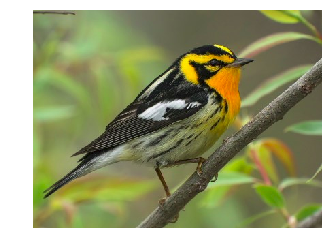

In [6]:
plt.imshow(img)
plt.axis('off')
plt.show()

Let's explore this image object a bit. What's its shape?  

In [7]:
# Get image shape        # Matrix of RGB tupples
img.shape

(320, 425, 3)

In [8]:
top_row = img[0]
print("top_row is a {} and has shape {}".format(type(top_row), top_row.shape))
top_left_pixel = top_row[0]
red, green, blue = top_left_pixel
print(red, green, blue)

top_row is a <class 'numpy.ndarray'> and has shape (425, 3)
0.533333 0.592157 0.392157


In [9]:
print(top_row)

[[ 0.53333336  0.59215689  0.39215687]
 [ 0.52549022  0.58431375  0.38431373]
 [ 0.51764709  0.57647061  0.36862746]
 ..., 
 [ 0.35294119  0.32941177  0.25490198]
 [ 0.36470589  0.34509805  0.27058825]
 [ 0.3764706   0.35686275  0.28235295]]


In [10]:
print(top_left_pixel)

[ 0.53333336  0.59215689  0.39215687]


In [11]:
type(top_left_pixel)

numpy.ndarray

In [12]:
top_left_pixel.tolist()

[0.5333333611488342, 0.5921568870544434, 0.3921568691730499]

Get a flattened list of pixels to use in clustering algorithm.

In [13]:
pixels = [pixel.tolist() for row in img for pixel in row]

In [14]:
pixels[:10]

[[0.5333333611488342, 0.5921568870544434, 0.3921568691730499],
 [0.5254902243614197, 0.5843137502670288, 0.3843137323856354],
 [0.5176470875740051, 0.5764706134796143, 0.3686274588108063],
 [0.5098039507865906, 0.5686274766921997, 0.3607843220233917],
 [0.5137255191802979, 0.5607843399047852, 0.35686275362968445],
 [0.5176470875740051, 0.5647059082984924, 0.3607843220233917],
 [0.5176470875740051, 0.5647059082984924, 0.3607843220233917],
 [0.5176470875740051, 0.5647059082984924, 0.3607843220233917],
 [0.5176470875740051, 0.5647059082984924, 0.3686274588108063],
 [0.5137255191802979, 0.5607843399047852, 0.364705890417099]]

Time to cluster. NOTE: We are NOT using sci-kit learn - using code from book mentioned above.

In [ ]:
clusterer = KMeans(4)
clusterer.train(pixels)
print(clusterer.means)

In [ ]:
plt.imshow(clusterer.means)

Now we can reconstruct the image with the new colors.

In [ ]:
def recolor(pixel):
    """
    Given an original pixel, recolor it based on the 
    color of its cluster
    """
    cluster = clusterer.classify(pixel)
    return clusterer.means[cluster]

We can use nested list comprehension to create the new image. Our "outer loop" is over the rows of the image and the inner loop is over the pixels in each row.

In [ ]:
new_image = [[recolor(pixel) for pixel in row] for row in img]

Display the new image

In [ ]:
plt.imshow(new_image)
plt.axis('off')
plt.show()